# Project 2 - Kaggle Challenges with (PricingHouse- Regression )



### Link to the Titanic Survival group kernel in Kaggle:
    
https://www.kaggle.com/abeeralzuhair2020/pricing-houses-challenge-dsi-group3

## Problem Statement
---
The Pricing House challenge is a competition organized by [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) where the aim is to predict the house price given two datasets in which the training data is in a separate file than the test data. In this competition, we will try to develop a set of models to find the best prediction for the house price.

The problem is a supervised learning problem because we are trying to predict the house price which is given in the dataset as a class label. In addition, this class label is a numerical variable, which is a regression problem. Based on that, we used several regression models to solve this problem which are (Lasso, LassoCV, Bagging, Gradient Tree Boosting, and Adaptative boosting). And to evaluate these models we use R-Square(R^2),  cross-validation, and Root Mean Square Error(RMSE) measures since it’s the metric that the competition uses in the leaderboard.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import](#Data-Import)
- [Data Cleaning and Exploratory Analysis](#Data-Cleaning-and-EDA)
- [Data Visualization](#Data-Visualization)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Datasets Description
-----

**train.csv:**
 - [Data Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - Data Information: Training data for Kaggle House Prices competition.
 
**test.csv:**
 - [Data Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - Data Information: Test data for Kaggle House Prices competition.


 
**Data Dictionary**

This data dictionary and subsequent info was obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).

| Variable |	Description  |
|----------|-----------------|
| MSSubClass |Identifies the type of dwelling involved in the sale.  |
| MSZoning  | Identifies the general zoning classification of the sale.|
| LotFrontage |Linear feet of street connected to property|
| LotArea  |Lot size in square feet|
| Street  |Type of road access to property|
| Alley  |Type of alley access to property| 
| LotShape  |General shape of property|
| LandContour  | Flatness of the property|
| Utilities  |Type of utilities available|
| LotConfig  | Lot configuration|
| LandSlope  |Slope of property|
|Neighborhood|Physical locations within Ames city limits|
|Condition1|Proximity to various conditions|
|Condition2|Proximity to various conditions (if more than one is present)|
|BldgType|Type of dwelling|
|HouseStyle|Style of dwelling|
|OverallQual|Rates the overall material and finish of the house|
|OverallCond|Rates the overall condition of the house|
|YearBuilt|Original construction date|
|YearRemodAdd|Remodel date (same as construction date if no remodeling or additions)|
|RoofStyle|Type of roof|
|RoofMatl|Roof material|
|Exterior1st|Exterior covering on house|
|Exterior2nd|Exterior covering on house (if more than one material)|
|MasVnrType|Masonry veneer type|
|MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Evaluates the quality of the material on the exterior |
|ExterCond|Evaluates the present condition of the material on the exterior|
|Foundation| Type of foundation|
|BsmtQual|Evaluates the height of the basement|
|BsmtCond|Evaluates the general condition of the basement|
|BsmtExposure|Refers to walkout or garden level walls|
|BsmtFinType1|Rating of basement finished area|
|BsmtFinSF1|Type 1 finished square feet|
|BsmtFinType2|Rating of basement finished area (if multiple types)|
|BsmtFinSF2| Type 2 finished square feet|
|BsmtUnfSF|Unfinished square feet of basement area|
|TotalBsmtSF|Total square feet of basement area|
|Heating|Type of heating|
|HeatingQC|Heating quality and condition|
|CentralAir|Central air conditioning|
|Electrical|Electrical system|
|1stFlrSF|First Floor square feet|
|2ndFlrSF|Second floor square feet|
|LowQualFinSF|Low quality finished square feet (all floors)|
|GrLivArea|Above grade (ground) living area square feet|
|BsmtFullBath|Basement full bathrooms|
|BsmtHalfBath|Basement half bathrooms|
|FullBath|Full bathrooms above grade|
|HalfBath|Half baths above grade|
|Bedroom|Bedrooms above grade (does NOT include basement bedrooms)|
|Kitchen|Kitchens above grade|
|KitchenQual|Kitchen quality|
|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|Functional|Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|Number of fireplaces|
|FireplaceQu|Fireplace quality|
|GarageType|Garage location|
|GarageYrBlt|Year garage was built|
|GarageFinish|Interior finish of the garage|
|GarageCars|Size of garage in car capacity|
|GarageArea|Size of garage in square feet|
|GarageQual|Garage quality|
|GarageCond|Garage condition|
|PavedDrive|Paved driveway|
|WoodDeckSF|Wood deck area in square feet|
|OpenPorchSF|Open porch area in square feet|
|EnclosedPorch|Enclosed porch area in square feet|
|3SsnPorch|Three season porch area in square feet|
|ScreenPorch|Screen porch area in square feet|
|PoolArea|Pool area in square feet|
|PoolQC|Pool quality|
|Fence|Fence quality|
|MiscFeature|Miscellaneous feature not covered in other categories|
|MiscVal|$Value of miscellaneous feature|
|MoSold|Month Sold (MM)|
|YrSold|Year Sold (YYYY)|
|SaleType|Type of sale|
|SaleCondition|Condition of sale|


## Data Import
---

#### Import Necessary Libraries:

In [96]:
# All libraries used in this project are added here
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

import seaborn as sns
sns.set(font_scale=1.1)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.dummy import DummyRegressor

#### Read In The House-Prices Data:

In [98]:
# read the dataset (both train & test) and save them as pandas data frames
                           
train=pd.read_csv('./DataSet/train.csv')
test=pd.read_csv('./DataSet/test.csv')

## Data Cleaning and EDA
---

### Inspect the data:

In [3]:
# show the first rows of train dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# show the first rows of test dataframe
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#show the dimensions (size) of the data
print('Training data:' , train.shape)
print('Testing data:' , test.shape)

Training data: (1460, 81)
Testing data: (1459, 80)


In [6]:
# show the basic information about train data (check: data types, null values)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# show the basic information about train data (check: data types, null values)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
# check: data types, null values in train data
null_col = []
for col in train.columns:
    null_value =train[col].isna().sum()
    if null_value != 0:
        null_col.append(col)
        print("{:>15} has {:>5} null values  {:7.2f}%".format(col, null_value, 100*null_value / len(train,)))

    LotFrontage has   259 null values    17.74%
          Alley has  1369 null values    93.77%
     MasVnrType has     8 null values     0.55%
     MasVnrArea has     8 null values     0.55%
       BsmtQual has    37 null values     2.53%
       BsmtCond has    37 null values     2.53%
   BsmtExposure has    38 null values     2.60%
   BsmtFinType1 has    37 null values     2.53%
   BsmtFinType2 has    38 null values     2.60%
     Electrical has     1 null values     0.07%
    FireplaceQu has   690 null values    47.26%
     GarageType has    81 null values     5.55%
    GarageYrBlt has    81 null values     5.55%
   GarageFinish has    81 null values     5.55%
     GarageQual has    81 null values     5.55%
     GarageCond has    81 null values     5.55%
         PoolQC has  1453 null values    99.52%
          Fence has  1179 null values    80.75%
    MiscFeature has  1406 null values    96.30%


In [9]:
# check: data types, null values in test data
null_col = []
for col in test.columns:
    null_value = test[col].isna().sum()
    if null_value != 0:
        null_col.append(col)
        print("{:>15} has {:>5} null values  {:7.2f}% ".format(col, null_value, 100*null_value / len(test)))

       MSZoning has     4 null values     0.27% 
    LotFrontage has   227 null values    15.56% 
          Alley has  1352 null values    92.67% 
      Utilities has     2 null values     0.14% 
    Exterior1st has     1 null values     0.07% 
    Exterior2nd has     1 null values     0.07% 
     MasVnrType has    16 null values     1.10% 
     MasVnrArea has    15 null values     1.03% 
       BsmtQual has    44 null values     3.02% 
       BsmtCond has    45 null values     3.08% 
   BsmtExposure has    44 null values     3.02% 
   BsmtFinType1 has    42 null values     2.88% 
     BsmtFinSF1 has     1 null values     0.07% 
   BsmtFinType2 has    42 null values     2.88% 
     BsmtFinSF2 has     1 null values     0.07% 
      BsmtUnfSF has     1 null values     0.07% 
    TotalBsmtSF has     1 null values     0.07% 
   BsmtFullBath has     2 null values     0.14% 
   BsmtHalfBath has     2 null values     0.14% 
    KitchenQual has     1 null values     0.07% 
     Functional has 

In [10]:
# Inspect for irregular values in training dataset
for col in train.columns:
    print('Counts of unique values in the column [', train[col].name,']:') 
    display( train[col].value_counts().to_frame() )

Counts of unique values in the column [ Id ]:


,Id
1460,1
479,1
481,1
482,1
483,1
...,...
976,1
977,1
978,1
979,1


Counts of unique values in the column [ MSSubClass ]:


,MSSubClass
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52
190,30


Counts of unique values in the column [ MSZoning ]:


,MSZoning
RL,1151
RM,218
FV,65
RH,16
C (all),10


Counts of unique values in the column [ LotFrontage ]:


,LotFrontage
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
...,...
106.0,1
38.0,1
138.0,1
140.0,1


Counts of unique values in the column [ LotArea ]:


,LotArea
7200,25
9600,24
6000,17
10800,14
9000,14
...,...
7094,1
6130,1
9337,1
5232,1


Counts of unique values in the column [ Street ]:


,Street
Pave,1454
Grvl,6


Counts of unique values in the column [ Alley ]:


,Alley
Grvl,50
Pave,41


Counts of unique values in the column [ LotShape ]:


,LotShape
Reg,925
IR1,484
IR2,41
IR3,10


Counts of unique values in the column [ LandContour ]:


,LandContour
Lvl,1311
Bnk,63
HLS,50
Low,36


Counts of unique values in the column [ Utilities ]:


,Utilities
AllPub,1459
NoSeWa,1


Counts of unique values in the column [ LotConfig ]:


,LotConfig
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


Counts of unique values in the column [ LandSlope ]:


,LandSlope
Gtl,1382
Mod,65
Sev,13


Counts of unique values in the column [ Neighborhood ]:


,Neighborhood
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73
SawyerW,59


Counts of unique values in the column [ Condition1 ]:


,Condition1
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


Counts of unique values in the column [ Condition2 ]:


,Condition2
Norm,1445
Feedr,6
RRNn,2
PosN,2
Artery,2
RRAe,1
PosA,1
RRAn,1


Counts of unique values in the column [ BldgType ]:


,BldgType
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


Counts of unique values in the column [ HouseStyle ]:


,HouseStyle
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


Counts of unique values in the column [ OverallQual ]:


,OverallQual
5,397
6,374
7,319
8,168
4,116
9,43
3,20
10,18
2,3
1,2


Counts of unique values in the column [ OverallCond ]:


,OverallCond
5,821
6,252
7,205
8,72
4,57
3,25
9,22
2,5
1,1


Counts of unique values in the column [ YearBuilt ]:


,YearBuilt
2006,67
2005,64
2004,54
2007,49
2003,45
...,...
1906,1
1911,1
1913,1
1917,1


Counts of unique values in the column [ YearRemodAdd ]:


,YearRemodAdd
1950,178
2006,97
2007,76
2005,73
2004,62
...,...
2010,6
1983,5
1952,5
1986,5


Counts of unique values in the column [ RoofStyle ]:


,RoofStyle
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


Counts of unique values in the column [ RoofMatl ]:


,RoofMatl
CompShg,1434
Tar&Grv,11
WdShngl,6
WdShake,5
Roll,1
Membran,1
Metal,1
ClyTile,1


Counts of unique values in the column [ Exterior1st ]:


,Exterior1st
VinylSd,515
HdBoard,222
MetalSd,220
Wd Sdng,206
Plywood,108
CemntBd,61
BrkFace,50
WdShing,26
Stucco,25
AsbShng,20


Counts of unique values in the column [ Exterior2nd ]:


,Exterior2nd
VinylSd,504
MetalSd,214
HdBoard,207
Wd Sdng,197
Plywood,142
CmentBd,60
Wd Shng,38
Stucco,26
BrkFace,25
AsbShng,20


Counts of unique values in the column [ MasVnrType ]:


,MasVnrType
None,864
BrkFace,445
Stone,128
BrkCmn,15


Counts of unique values in the column [ MasVnrArea ]:


,MasVnrArea
0.0,861
72.0,8
180.0,8
108.0,8
120.0,7
...,...
651.0,1
337.0,1
415.0,1
293.0,1


Counts of unique values in the column [ ExterQual ]:


,ExterQual
TA,906
Gd,488
Ex,52
Fa,14


Counts of unique values in the column [ ExterCond ]:


,ExterCond
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


Counts of unique values in the column [ Foundation ]:


,Foundation
PConc,647
CBlock,634
BrkTil,146
Slab,24
Stone,6
Wood,3


Counts of unique values in the column [ BsmtQual ]:


,BsmtQual
TA,649
Gd,618
Ex,121
Fa,35


Counts of unique values in the column [ BsmtCond ]:


,BsmtCond
TA,1311
Gd,65
Fa,45
Po,2


Counts of unique values in the column [ BsmtExposure ]:


,BsmtExposure
No,953
Av,221
Gd,134
Mn,114


Counts of unique values in the column [ BsmtFinType1 ]:


,BsmtFinType1
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74


Counts of unique values in the column [ BsmtFinSF1 ]:


,BsmtFinSF1
0,467
24,12
16,9
20,5
686,5
...,...
1032,1
1022,1
599,1
1018,1


Counts of unique values in the column [ BsmtFinType2 ]:


,BsmtFinType2
Unf,1256
Rec,54
LwQ,46
BLQ,33
ALQ,19
GLQ,14


Counts of unique values in the column [ BsmtFinSF2 ]:


,BsmtFinSF2
0,1293
180,5
374,3
551,2
93,2
...,...
532,1
544,1
546,1
547,1


Counts of unique values in the column [ BsmtUnfSF ]:


,BsmtUnfSF
0,118
728,9
384,8
572,7
600,7
...,...
731,1
730,1
726,1
725,1


Counts of unique values in the column [ TotalBsmtSF ]:


,TotalBsmtSF
0,37
864,35
672,17
912,15
1040,14
...,...
1463,1
1459,1
1454,1
1019,1


Counts of unique values in the column [ Heating ]:


,Heating
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


Counts of unique values in the column [ HeatingQC ]:


,HeatingQC
Ex,741
TA,428
Gd,241
Fa,49
Po,1


Counts of unique values in the column [ CentralAir ]:


,CentralAir
Y,1365
N,95


Counts of unique values in the column [ Electrical ]:


,Electrical
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


Counts of unique values in the column [ 1stFlrSF ]:


,1stFlrSF
864,25
1040,16
912,14
848,12
894,12
...,...
1285,1
1287,1
1288,1
1297,1


Counts of unique values in the column [ 2ndFlrSF ]:


,2ndFlrSF
0,829
728,10
504,9
672,8
546,8
...,...
788,1
1116,1
1112,1
1111,1


Counts of unique values in the column [ LowQualFinSF ]:


,LowQualFinSF
0,1434
80,3
360,2
528,1
53,1
120,1
144,1
156,1
205,1
232,1


Counts of unique values in the column [ GrLivArea ]:


,GrLivArea
864,22
1040,14
894,11
848,10
1456,10
...,...
3447,1
1396,1
1395,1
1393,1


Counts of unique values in the column [ BsmtFullBath ]:


,BsmtFullBath
0,856
1,588
2,15
3,1


Counts of unique values in the column [ BsmtHalfBath ]:


,BsmtHalfBath
0,1378
1,80
2,2


Counts of unique values in the column [ FullBath ]:


,FullBath
2,768
1,650
3,33
0,9


Counts of unique values in the column [ HalfBath ]:


,HalfBath
0,913
1,535
2,12


Counts of unique values in the column [ BedroomAbvGr ]:


,BedroomAbvGr
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


Counts of unique values in the column [ KitchenAbvGr ]:


,KitchenAbvGr
1,1392
2,65
3,2
0,1


Counts of unique values in the column [ KitchenQual ]:


,KitchenQual
TA,735
Gd,586
Ex,100
Fa,39


Counts of unique values in the column [ TotRmsAbvGrd ]:


,TotRmsAbvGrd
6,402
7,329
5,275
8,187
4,97
9,75
10,47
11,18
3,17
12,11


Counts of unique values in the column [ Functional ]:


,Functional
Typ,1360
Min2,34
Min1,31
Mod,15
Maj1,14
Maj2,5
Sev,1


Counts of unique values in the column [ Fireplaces ]:


,Fireplaces
0,690
1,650
2,115
3,5


Counts of unique values in the column [ FireplaceQu ]:


,FireplaceQu
Gd,380
TA,313
Fa,33
Ex,24
Po,20


Counts of unique values in the column [ GarageType ]:


,GarageType
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


Counts of unique values in the column [ GarageYrBlt ]:


,GarageYrBlt
2005.0,65
2006.0,59
2004.0,53
2003.0,50
2007.0,49
...,...
1908.0,1
1927.0,1
1933.0,1
1900.0,1


Counts of unique values in the column [ GarageFinish ]:


,GarageFinish
Unf,605
RFn,422
Fin,352


Counts of unique values in the column [ GarageCars ]:


,GarageCars
2,824
1,369
3,181
0,81
4,5


Counts of unique values in the column [ GarageArea ]:


,GarageArea
0,81
440,49
576,47
240,38
484,34
...,...
754,1
459,1
458,1
756,1


Counts of unique values in the column [ GarageQual ]:


,GarageQual
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


Counts of unique values in the column [ GarageCond ]:


,GarageCond
TA,1326
Fa,35
Gd,9
Po,7
Ex,2


Counts of unique values in the column [ PavedDrive ]:


,PavedDrive
Y,1340
N,90
P,30


Counts of unique values in the column [ WoodDeckSF ]:


,WoodDeckSF
0,761
192,38
100,36
144,33
120,31
...,...
269,1
265,1
263,1
260,1


Counts of unique values in the column [ OpenPorchSF ]:


,OpenPorchSF
0,656
36,29
48,22
20,21
40,19
...,...
159,1
156,1
148,1
142,1


Counts of unique values in the column [ EnclosedPorch ]:


,EnclosedPorch
0,1252
112,15
96,6
120,5
144,5
...,...
174,1
177,1
183,1
189,1


Counts of unique values in the column [ 3SsnPorch ]:


,3SsnPorch
0,1436
168,3
216,2
144,2
180,2
245,1
238,1
290,1
196,1
182,1


Counts of unique values in the column [ ScreenPorch ]:


,ScreenPorch
0,1344
192,6
224,5
120,5
189,4
...,...
182,1
440,1
178,1
312,1


Counts of unique values in the column [ PoolArea ]:


,PoolArea
0,1453
738,1
648,1
576,1
555,1
519,1
512,1
480,1


Counts of unique values in the column [ PoolQC ]:


,PoolQC
Gd,3
Ex,2
Fa,2


Counts of unique values in the column [ Fence ]:


,Fence
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


Counts of unique values in the column [ MiscFeature ]:


,MiscFeature
Shed,49
Gar2,2
Othr,2
TenC,1


Counts of unique values in the column [ MiscVal ]:


,MiscVal
0,1408
400,11
500,8
700,5
450,4
2000,4
600,4
1200,2
480,2
1150,1


Counts of unique values in the column [ MoSold ]:


,MoSold
6,253
7,234
5,204
4,141
8,122
3,106
10,89
11,79
9,63
12,59


Counts of unique values in the column [ YrSold ]:


,YrSold
2009,338
2007,329
2006,314
2008,304
2010,175


Counts of unique values in the column [ SaleType ]:


,SaleType
WD,1267
New,122
COD,43
ConLD,9
ConLw,5
ConLI,5
CWD,4
Oth,3
Con,2


Counts of unique values in the column [ SaleCondition ]:


,SaleCondition
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


Counts of unique values in the column [ SalePrice ]:


,SalePrice
140000,20
135000,17
145000,14
155000,14
190000,13
...,...
84900,1
424870,1
415298,1
62383,1


In [11]:
# Inspect for irregular values in testing dataset
for col in test.columns:
    print('Counts of unique values in the column [', test[col].name,']:') 
    display( test[col].value_counts().to_frame() )

Counts of unique values in the column [ Id ]:


,Id
2047,1
2526,1
2528,1
2529,1
2530,1
...,...
1563,1
1564,1
1565,1
1566,1


Counts of unique values in the column [ MSSubClass ]:


,MSSubClass
20,543
60,276
50,143
120,95
30,70
70,68
160,65
80,60
90,57
190,31


Counts of unique values in the column [ MSZoning ]:


,MSZoning
RL,1114
RM,242
FV,74
C (all),15
RH,10


Counts of unique values in the column [ LotFrontage ]:


,LotFrontage
60.0,133
80.0,68
70.0,63
50.0,60
75.0,52
...,...
22.0,1
136.0,1
149.0,1
31.0,1


Counts of unique values in the column [ LotArea ]:


,LotArea
9600,20
7200,18
6000,17
9000,15
7500,12
...,...
9638,1
9545,1
11563,1
13607,1


Counts of unique values in the column [ Street ]:


,Street
Pave,1453
Grvl,6


Counts of unique values in the column [ Alley ]:


,Alley
Grvl,70
Pave,37


Counts of unique values in the column [ LotShape ]:


,LotShape
Reg,934
IR1,484
IR2,35
IR3,6


Counts of unique values in the column [ LandContour ]:


,LandContour
Lvl,1311
HLS,70
Bnk,54
Low,24


Counts of unique values in the column [ Utilities ]:


,Utilities
AllPub,1457


Counts of unique values in the column [ LotConfig ]:


,LotConfig
Inside,1081
Corner,248
CulDSac,82
FR2,38
FR3,10


Counts of unique values in the column [ LandSlope ]:


,LandSlope
Gtl,1396
Mod,60
Sev,3


Counts of unique values in the column [ Neighborhood ]:


,Neighborhood
NAmes,218
OldTown,126
CollgCr,117
Somerst,96
Edwards,94
NridgHt,89
Gilbert,86
Sawyer,77
SawyerW,66
Mitchel,65


Counts of unique values in the column [ Condition1 ]:


,Condition1
Norm,1251
Feedr,83
Artery,44
RRAn,24
PosN,20
RRAe,17
PosA,12
RRNe,4
RRNn,4


Counts of unique values in the column [ Condition2 ]:


,Condition2
Norm,1444
Feedr,7
PosA,3
Artery,3
PosN,2


Counts of unique values in the column [ BldgType ]:


,BldgType
1Fam,1205
TwnhsE,113
Duplex,57
Twnhs,53
2fmCon,31


Counts of unique values in the column [ HouseStyle ]:


,HouseStyle
1Story,745
2Story,427
1.5Fin,160
SLvl,63
SFoyer,46
2.5Unf,13
1.5Unf,5


Counts of unique values in the column [ OverallQual ]:


,OverallQual
5,428
6,357
7,281
8,174
4,110
9,64
3,20
10,13
2,10
1,2


Counts of unique values in the column [ OverallCond ]:


,OverallCond
5,824
6,279
7,185
8,72
4,44
3,25
9,19
1,6
2,5


Counts of unique values in the column [ YearBuilt ]:


,YearBuilt
2005,78
2006,71
2007,60
2004,45
2003,43
...,...
1902,1
1896,1
1982,1
1880,1


Counts of unique values in the column [ YearRemodAdd ]:


,YearRemodAdd
1950,183
2006,105
2007,88
2005,68
2004,49
...,...
1988,6
1983,6
1985,5
1981,4


Counts of unique values in the column [ RoofStyle ]:


,RoofStyle
Gable,1169
Hip,265
Gambrel,11
Flat,7
Mansard,4
Shed,3


Counts of unique values in the column [ RoofMatl ]:


,RoofMatl
CompShg,1442
Tar&Grv,12
WdShake,4
WdShngl,1


Counts of unique values in the column [ Exterior1st ]:


,Exterior1st
VinylSd,510
MetalSd,230
HdBoard,220
Wd Sdng,205
Plywood,113
CemntBd,65
BrkFace,37
WdShing,30
AsbShng,24
Stucco,18


Counts of unique values in the column [ Exterior2nd ]:


,Exterior2nd
VinylSd,510
MetalSd,233
HdBoard,199
Wd Sdng,194
Plywood,128
CmentBd,66
Wd Shng,43
BrkFace,22
Stucco,21
AsbShng,18


Counts of unique values in the column [ MasVnrType ]:


,MasVnrType
None,878
BrkFace,434
Stone,121
BrkCmn,10


Counts of unique values in the column [ MasVnrArea ]:


,MasVnrArea
0.0,877
176.0,10
144.0,9
120.0,8
216.0,8
...,...
634.0,1
177.0,1
615.0,1
549.0,1


Counts of unique values in the column [ ExterQual ]:


,ExterQual
TA,892
Gd,491
Ex,55
Fa,21


Counts of unique values in the column [ ExterCond ]:


,ExterCond
TA,1256
Gd,153
Fa,39
Ex,9
Po,2


Counts of unique values in the column [ Foundation ]:


,Foundation
PConc,661
CBlock,601
BrkTil,165
Slab,25
Stone,5
Wood,2


Counts of unique values in the column [ BsmtQual ]:


,BsmtQual
TA,634
Gd,591
Ex,137
Fa,53


Counts of unique values in the column [ BsmtCond ]:


,BsmtCond
TA,1295
Fa,59
Gd,57
Po,3


Counts of unique values in the column [ BsmtExposure ]:


,BsmtExposure
No,951
Av,197
Gd,142
Mn,125


Counts of unique values in the column [ BsmtFinType1 ]:


,BsmtFinType1
GLQ,431
Unf,421
ALQ,209
Rec,155
BLQ,121
LwQ,80


Counts of unique values in the column [ BsmtFinSF1 ]:


,BsmtFinSF1
0.0,462
24.0,15
276.0,6
602.0,6
300.0,5
...,...
278.0,1
210.0,1
580.0,1
1328.0,1


Counts of unique values in the column [ BsmtFinType2 ]:


,BsmtFinType2
Unf,1237
Rec,51
LwQ,41
BLQ,35
ALQ,33
GLQ,20


Counts of unique values in the column [ BsmtFinSF2 ]:


,BsmtFinSF2
0.0,1278
162.0,3
294.0,3
483.0,3
144.0,2
...,...
308.0,1
167.0,1
186.0,1
250.0,1


Counts of unique values in the column [ BsmtUnfSF ]:


,BsmtUnfSF
0.0,123
384.0,11
624.0,8
480.0,7
100.0,7
...,...
406.0,1
1604.0,1
1369.0,1
549.0,1


Counts of unique values in the column [ TotalBsmtSF ]:


,TotalBsmtSF
0.0,41
864.0,39
960.0,13
546.0,12
672.0,12
...,...
918.0,1
1910.0,1
1700.0,1
750.0,1


Counts of unique values in the column [ Heating ]:


,Heating
GasA,1446
GasW,9
Wall,2
Grav,2


Counts of unique values in the column [ HeatingQC ]:


,HeatingQC
Ex,752
TA,429
Gd,233
Fa,43
Po,2


Counts of unique values in the column [ CentralAir ]:


,CentralAir
Y,1358
N,101


Counts of unique values in the column [ Electrical ]:


,Electrical
SBrkr,1337
FuseA,94
FuseF,23
FuseP,5


Counts of unique values in the column [ 1stFlrSF ]:


,1stFlrSF
864,21
546,12
1040,12
960,11
936,10
...,...
1334,1
1332,1
1330,1
1325,1


Counts of unique values in the column [ 2ndFlrSF ]:


,2ndFlrSF
0,839
546,15
728,8
504,8
886,7
...,...
873,1
875,1
881,1
887,1


Counts of unique values in the column [ LowQualFinSF ]:


,LowQualFinSF
0,1445
1064,1
697,1
512,1
450,1
436,1
431,1
362,1
312,1
259,1


Counts of unique values in the column [ GrLivArea ]:


,GrLivArea
864,19
1092,18
1040,11
1456,10
936,9
...,...
1774,1
1773,1
1215,1
1771,1


Counts of unique values in the column [ BsmtFullBath ]:


,BsmtFullBath
0.0,849
1.0,584
2.0,23
3.0,1


Counts of unique values in the column [ BsmtHalfBath ]:


,BsmtHalfBath
0.0,1364
1.0,91
2.0,2


Counts of unique values in the column [ FullBath ]:


,FullBath
2,762
1,659
3,31
4,4
0,3


Counts of unique values in the column [ HalfBath ]:


,HalfBath
0,921
1,525
2,13


Counts of unique values in the column [ BedroomAbvGr ]:


,BedroomAbvGr
3,792
2,384
4,187
1,53
5,27
6,14
0,2


Counts of unique values in the column [ KitchenAbvGr ]:


,KitchenAbvGr
1,1393
2,64
0,2


Counts of unique values in the column [ KitchenQual ]:


,KitchenQual
TA,757
Gd,565
Ex,105
Fa,31


Counts of unique values in the column [ TotRmsAbvGrd ]:


,TotRmsAbvGrd
6,442
7,320
5,308
8,160
4,99
9,68
10,33
11,14
3,8
12,5


Counts of unique values in the column [ Functional ]:


,Functional
Typ,1357
Min2,36
Min1,34
Mod,20
Maj1,5
Maj2,4
Sev,1


Counts of unique values in the column [ Fireplaces ]:


,Fireplaces
0,730
1,618
2,104
3,6
4,1


Counts of unique values in the column [ FireplaceQu ]:


,FireplaceQu
Gd,364
TA,279
Fa,41
Po,26
Ex,19


Counts of unique values in the column [ GarageType ]:


,GarageType
Attchd,853
Detchd,392
BuiltIn,98
2Types,17
Basment,17
CarPort,6


Counts of unique values in the column [ GarageYrBlt ]:


,GarageYrBlt
2005.0,77
2007.0,66
2006.0,56
2004.0,46
2003.0,42
...,...
1918.0,1
1895.0,1
1919.0,1
1896.0,1


Counts of unique values in the column [ GarageFinish ]:


,GarageFinish
Unf,625
RFn,389
Fin,367


Counts of unique values in the column [ GarageCars ]:


,GarageCars
2.0,770
1.0,407
3.0,193
0.0,76
4.0,11
5.0,1


Counts of unique values in the column [ GarageArea ]:


,GarageArea
0.0,76
576.0,50
440.0,47
484.0,34
400.0,33
...,...
364.0,1
369.0,1
316.0,1
226.0,1


Counts of unique values in the column [ GarageQual ]:


,GarageQual
TA,1293
Fa,76
Gd,10
Po,2


Counts of unique values in the column [ GarageCond ]:


,GarageCond
TA,1328
Fa,39
Po,7
Gd,6
Ex,1


Counts of unique values in the column [ PavedDrive ]:


,PavedDrive
Y,1301
N,126
P,32


Counts of unique values in the column [ WoodDeckSF ]:


,WoodDeckSF
0,762
100,38
192,32
144,28
168,28
...,...
285,1
279,1
278,1
274,1


Counts of unique values in the column [ OpenPorchSF ]:


,OpenPorchSF
0,642
48,29
32,27
40,25
36,23
...,...
188,1
184,1
183,1
178,1


Counts of unique values in the column [ EnclosedPorch ]:


,EnclosedPorch
0,1208
96,7
168,7
112,7
84,6
...,...
190,1
196,1
200,1
203,1


Counts of unique values in the column [ 3SsnPorch ]:


,3SsnPorch
0,1446
153,2
360,1
323,1
255,1
225,1
224,1
219,1
176,1
174,1


Counts of unique values in the column [ ScreenPorch ]:


,ScreenPorch
0,1319
144,10
168,7
216,6
200,5
...,...
490,1
162,1
150,1
148,1


Counts of unique values in the column [ PoolArea ]:


,PoolArea
0,1453
800,1
561,1
444,1
368,1
228,1
144,1


Counts of unique values in the column [ PoolQC ]:


,PoolQC
Ex,2
Gd,1


Counts of unique values in the column [ Fence ]:


,Fence
MnPrv,172
GdPrv,59
GdWo,58
MnWw,1


Counts of unique values in the column [ MiscFeature ]:


,MiscFeature
Shed,46
Gar2,3
Othr,2


Counts of unique values in the column [ MiscVal ]:


,MiscVal
0,1408
400,7
450,5
500,5
600,4
650,3
2000,3
1500,3
3000,2
4500,2


Counts of unique values in the column [ MoSold ]:


,MoSold
6,250
7,212
5,190
4,138
3,126
8,111
9,95
10,84
2,81
1,64


Counts of unique values in the column [ YrSold ]:


,YrSold
2007,363
2008,318
2009,309
2006,305
2010,164


Counts of unique values in the column [ SaleType ]:


,SaleType
WD,1258
New,117
COD,44
ConLD,17
CWD,8
ConLI,4
Oth,4
ConLw,3
Con,3


Counts of unique values in the column [ SaleCondition ]:


,SaleCondition
Normal,1204
Partial,120
Abnorml,89
Family,26
Alloca,12
AdjLand,8


### General observations from the data inspection:
 - There are 1460 rows and 81 columns in the training data
 - There are 1459 rows and 80 columns in the testing data
 - There are no weird values or inconsistent data in both datasets, however there are some missing values

**In Training Data**

  - LotFrontage has   259 null values 17.74%
  -       Alley has  1369 null values 93.77%
  -  MasVnrType has     8 null values 0.55%
  -  MasVnrArea has     8 null values 0.55%
  -    BsmtQual has    37 null values 2.53%
  -    BsmtCond has    37 null values 2.53%
  - BsmtExposure has    38 null values 2.60%
  - BsmtFinType1 has    37 null values 2.53%
  - BsmtFinType2 has    38 null values 2.60%
  -  Electrical has     1 null values 0.07%
  - FireplaceQu has   690 null values 47.26%
  -  GarageType has    81 null values 5.55%
  - GarageYrBlt has    81 null values 5.55%
  - GarageFinish has    81 null values 5.55%
  -  GarageQual has    81 null values 5.55%
  -  GarageCond has    81 null values 5.55%
  -      PoolQC has  1453 null values 99.52%
  -       Fence has  1179 null values 80.75%
  - MiscFeature has  1406 null values 96.30%
 
**In Testing Data**
 -   MSZoning has        4 null values     0.27% 
 -   LotFrontage has   227 null values    15.56% 
 -         Alley has  1352 null values    92.67% 
 -     Utilities has     2 null values     0.14% 
 -   Exterior1st has     1 null values     0.07% 
 -   Exterior2nd has     1 null values     0.07% 
 -    MasVnrType has    16 null values     1.10% 
 -    MasVnrArea has    15 null values     1.03% 
 -      BsmtQual has    44 null values     3.02% 
 -      BsmtCond has    45 null values     3.08% 
 -  BsmtExposure has    44 null values     3.02% 
 -  BsmtFinType1 has    42 null values     2.88% 
 -    BsmtFinSF1 has     1 null values     0.07% 
 -  BsmtFinType2 has    42 null values     2.88% 
 -    BsmtFinSF2 has     1 null values     0.07% 
 -     BsmtUnfSF has     1 null values     0.07% 
 -   TotalBsmtSF has     1 null values     0.07% 
 -  BsmtFullBath has     2 null values     0.14% 
 -  BsmtHalfBath has     2 null values     0.14% 
 -   KitchenQual has     1 null values     0.07% 
 -    Functional has     2 null values     0.14% 
 -   FireplaceQu has   730 null values    50.03% 
 -    GarageType has    76 null values     5.21% 
 -   GarageYrBlt has    78 null values     5.35% 
 -  GarageFinish has    78 null values     5.35% 
 -    GarageCars has     1 null values     0.07% 
 -    GarageArea has     1 null values     0.07% 
 -    GarageQual has    78 null values     5.35% 
 -    GarageCond has    78 null values     5.35% 
 -        PoolQC has  1456 null values    99.79% 
 -         Fence has  1169 null values    80.12% 
 -   MiscFeature has  1408 null values    96.50% 
 -      SaleType has     1 null values     0.07% 

### Data Cleaning:

#### Filling null values with appropriate values:

In [18]:
train['Alley'].fillna("no_alley_access", inplace = True)
train['BsmtExposure'].fillna("no_basement", inplace = True)
train['BsmtFinType1'].fillna("no_basement", inplace = True)
train['BsmtFinType2'].fillna("no_basement", inplace = True)
train['BsmtQual'].fillna("no_basement", inplace = True)
train['BsmtCond'].fillna("no_basement", inplace = True)
train['FireplaceQu'].fillna("no_fireplace", inplace = True)
train['GarageType'].fillna("no_garage", inplace = True)
train['GarageFinish'].fillna("no_garage", inplace = True)
train['GarageQual'].fillna("no_garage", inplace = True)
train['GarageCond'].fillna("no_garage", inplace = True)
train['GarageYrBlt'].fillna(0, inplace = True)#means no garage
train['PoolQC'].fillna("no_pool", inplace = True)
train['Fence'].fillna("no_fence", inplace = True)
train['MiscFeature'].fillna("None", inplace = True)
train['MasVnrType'].fillna("None", inplace = True)

In [19]:
test['Alley'].fillna("no_alley_access", inplace = True)
test['BsmtExposure'].fillna("no_basement", inplace = True)
test['BsmtFinType1'].fillna("no_basement", inplace = True)
test['BsmtFinType2'].fillna("no_basement", inplace = True)
test['BsmtQual'].fillna("no_basement", inplace = True)
test['BsmtCond'].fillna("no_basement", inplace = True)
test['FireplaceQu'].fillna("no_fireplace", inplace = True)
test['GarageType'].fillna("no_garage", inplace = True)
test['GarageFinish'].fillna("no_garage", inplace = True)
test['GarageQual'].fillna("no_garage", inplace = True)
test['GarageCond'].fillna("no_garage", inplace = True)
test['GarageYrBlt'].fillna(0, inplace = True)#means no garage
test['GarageCars'].fillna(0, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['PoolQC'].fillna("no_pool", inplace = True)
test['Fence'].fillna("no_fence", inplace = True)
test['MiscFeature'].fillna("None", inplace = True)
test['MasVnrType'].fillna("None", inplace = True)

In [20]:
train['LotFrontage']=train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage']=test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [21]:
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0], inplace=True)
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0], inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0], inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0], inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)

In [22]:
# check if we handled all null values

print(len(train.columns[train.isna().any()]))
print(len(test.columns[test.isna().any()]))

0
0


#### Dealing with wrong data types:

In [54]:
# Dealing with wrong data types
train['GarageYrBlt']=train['GarageYrBlt'].apply(lambda x: int(x))
test['GarageYrBlt']=test['GarageYrBlt'].apply(lambda x: int(x))

----

### Exploratory Data Analysis:

In [25]:
# show summary statistics for training dataset
train.drop('Id', axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
# show summary statistics for testing dataset
test.drop('Id', axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.955106,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,52.583276,...,472.444825,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,20.999091,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,176.698671,...,217.326902,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,317.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Data Visualization

In [27]:
# dividing columns names into 2 sets for easier visualization

Categorical_cols=['MSSubClass','MSZoning','Street','Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig',
                  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'OverallQual', 
                  'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical','BsmtFullBath', 
                  'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','KitchenQual','Functional',
                  'Fireplaces','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond', 
                  'PavedDrive','PoolQC', 'Fence', 'MiscFeature','MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Numeric_cols =['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd','GarageCars', 'GarageArea','WoodDeckSF', 
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

<function matplotlib.pyplot.show(close=None, block=None)>

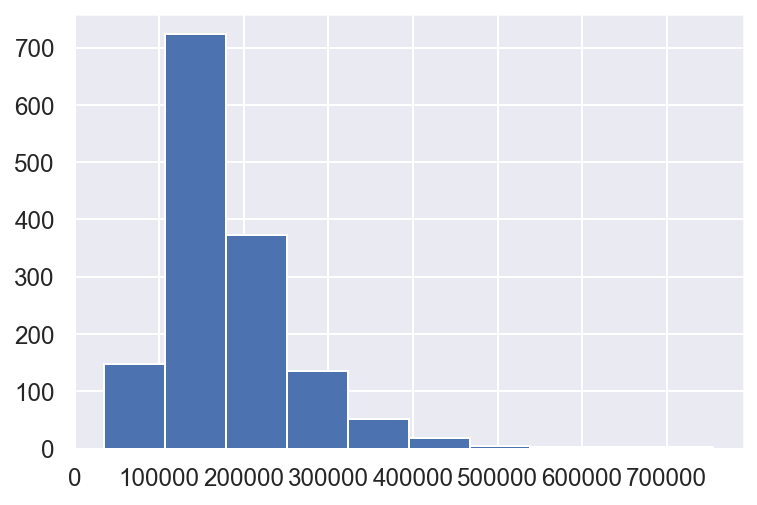

In [28]:
# Visualize the distribution of SalePrice (not normal, Positive Skewed )

plt.hist(train['SalePrice'])
plt.show

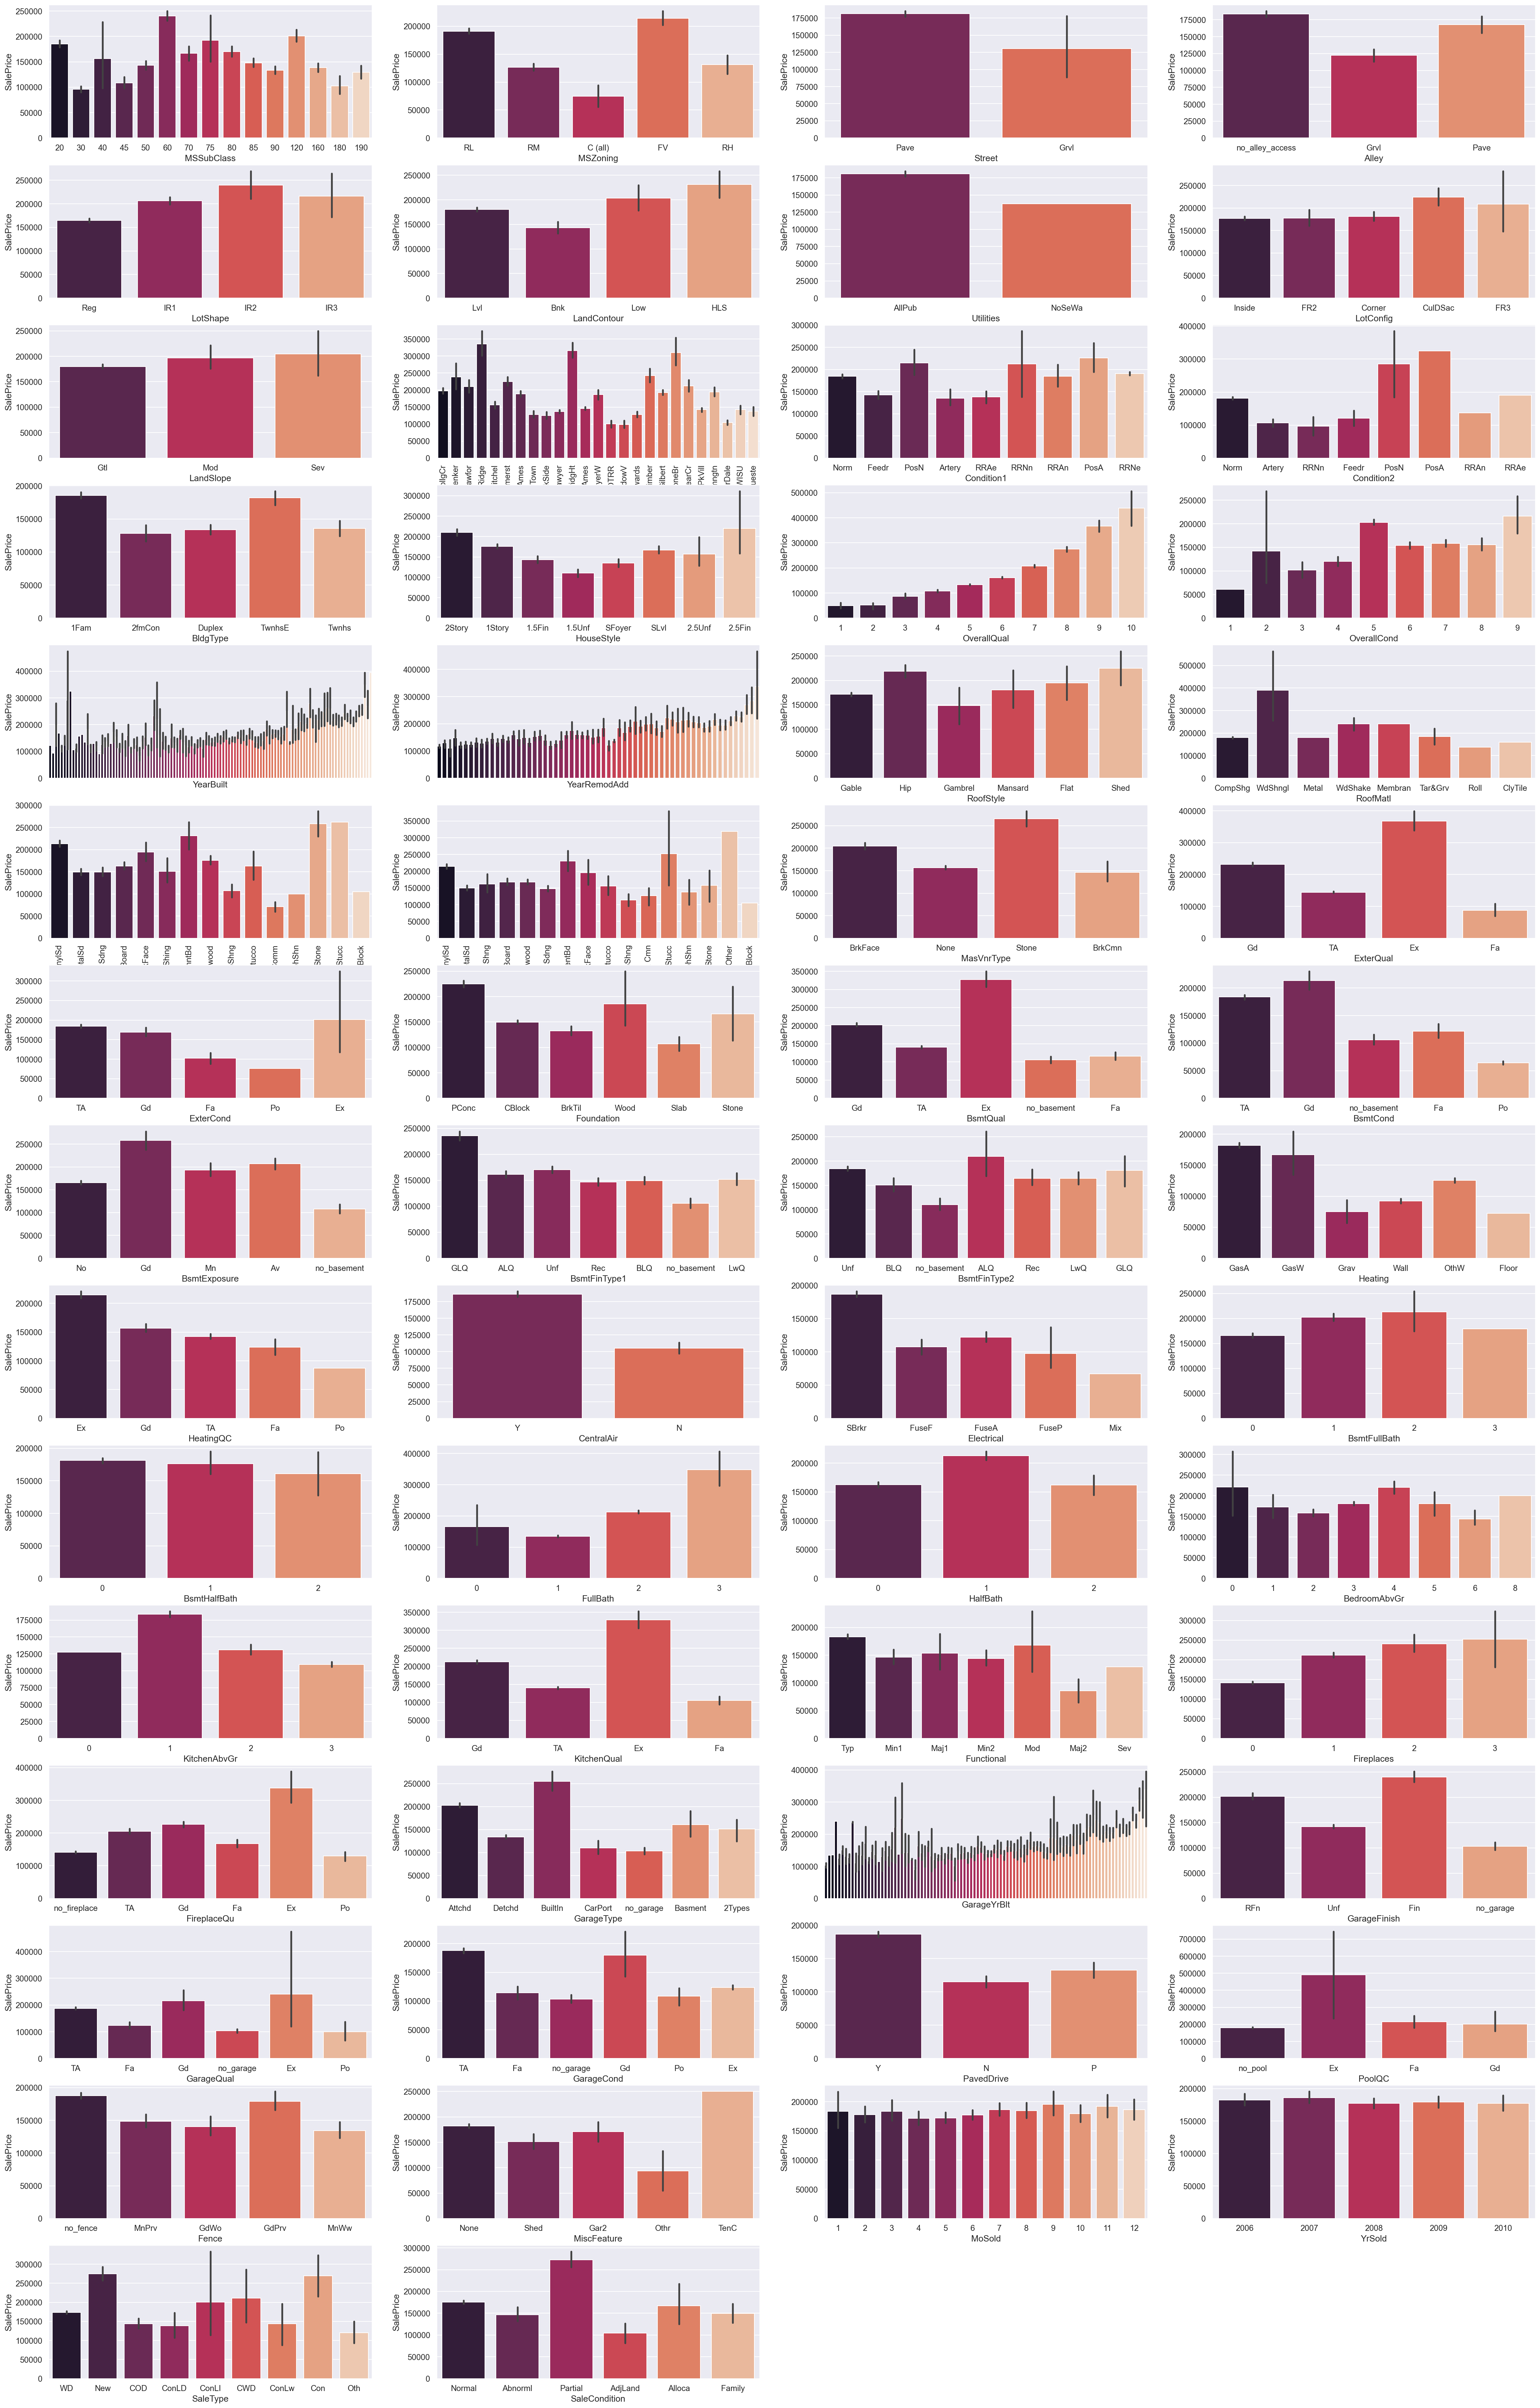

In [31]:
# visualize SalePrice based on Categorical_cols

plt.figure(figsize=(40, 70))

col_label = ['Neighborhood','Exterior1st', 'Exterior2nd']
col_label2 = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']
for i, col in enumerate(Categorical_cols):
    plt.subplot(16,4, i+1)
    sns.barplot(x=col,y='SalePrice',data=train,palette="rocket")
    if col in col_label:
        plt.xticks(rotation=90);
    if col in col_label2:
        plt.xticks([])  
    
plt.show()

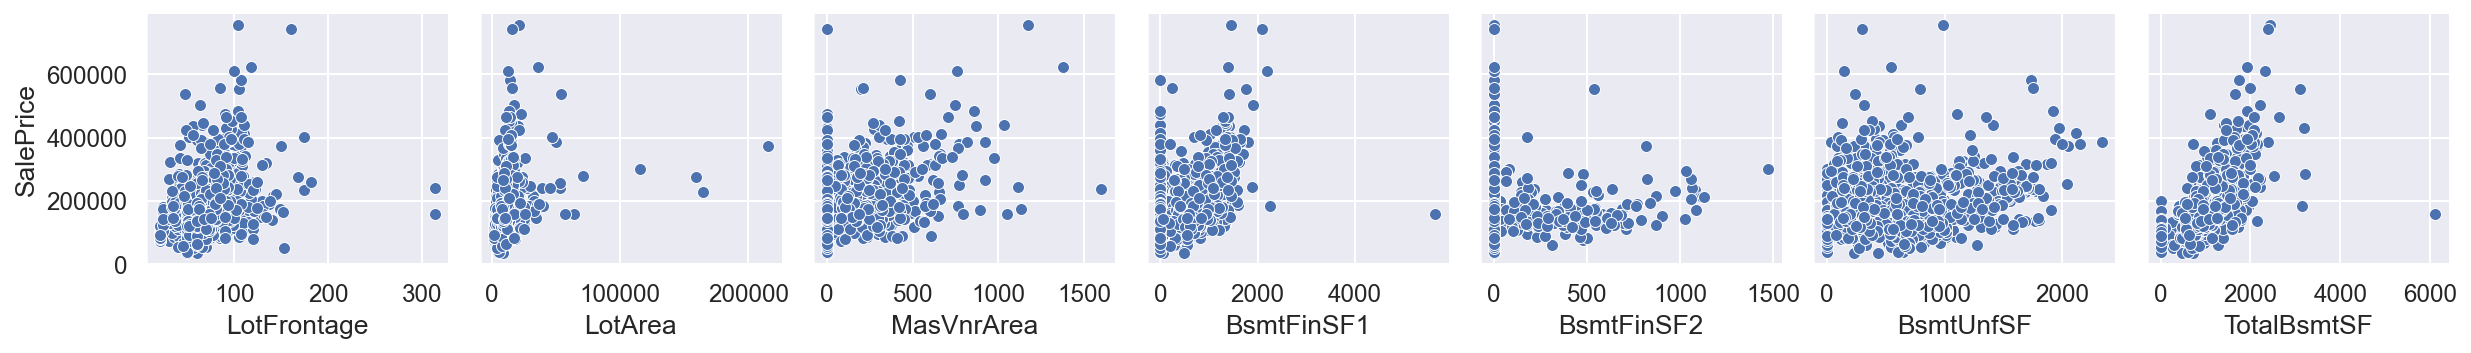

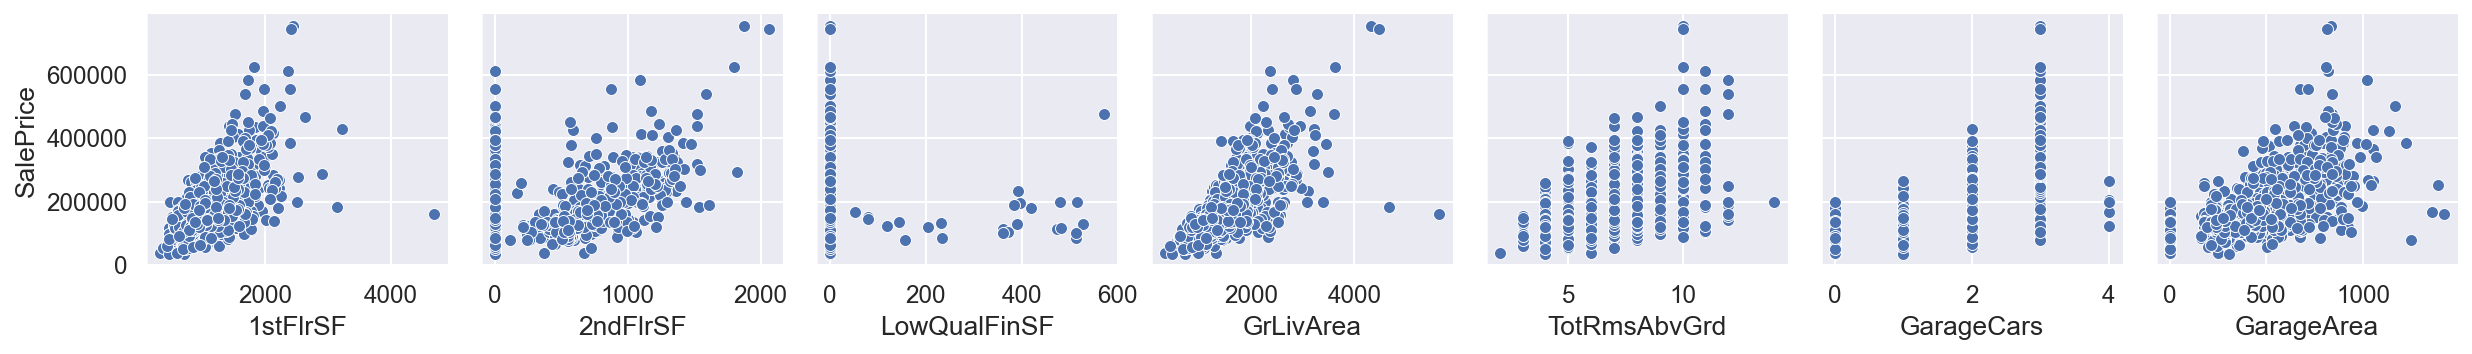

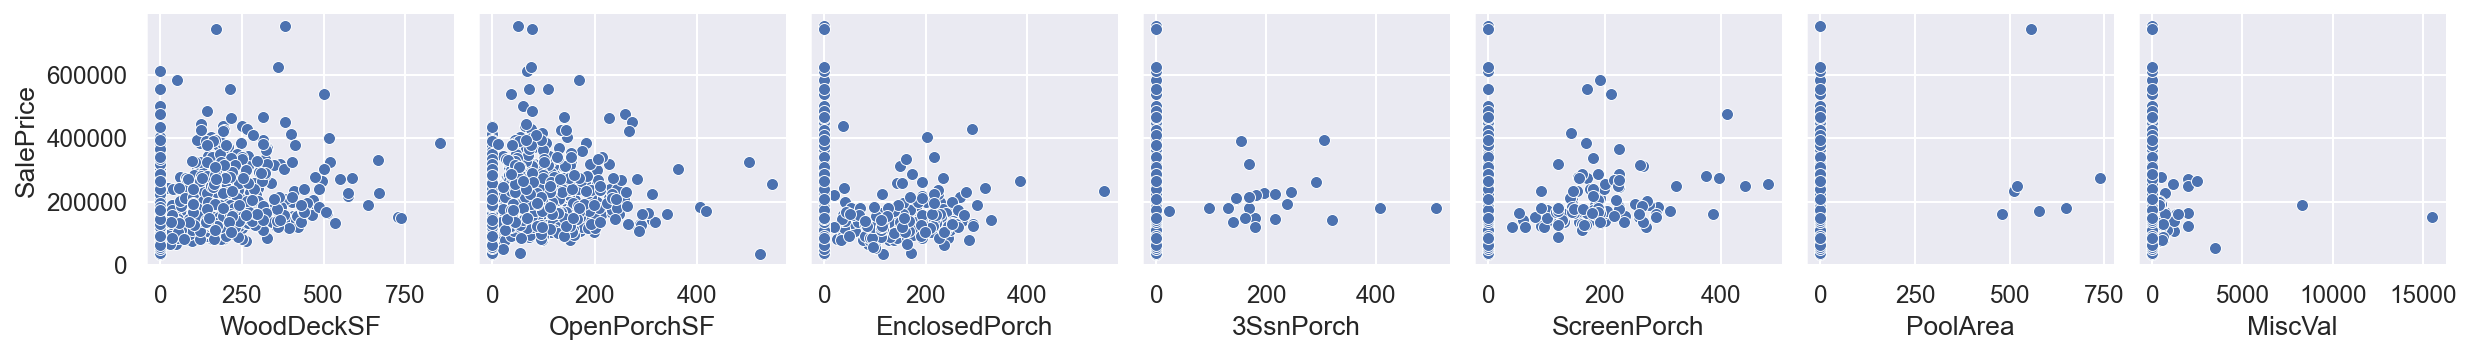

In [32]:
# visualize SalePrice based on Numeric_cols

sns.pairplot(x_vars=Numeric_cols[0:7], y_vars='SalePrice', kind = 'scatter',data=train,diag_kind = None)
sns.pairplot(x_vars=Numeric_cols[7:14], y_vars='SalePrice', kind = 'scatter',data=train,diag_kind = None)
sns.pairplot(x_vars=Numeric_cols[14:21], y_vars='SalePrice', kind = 'scatter',data=train,diag_kind = None)

plt.show()

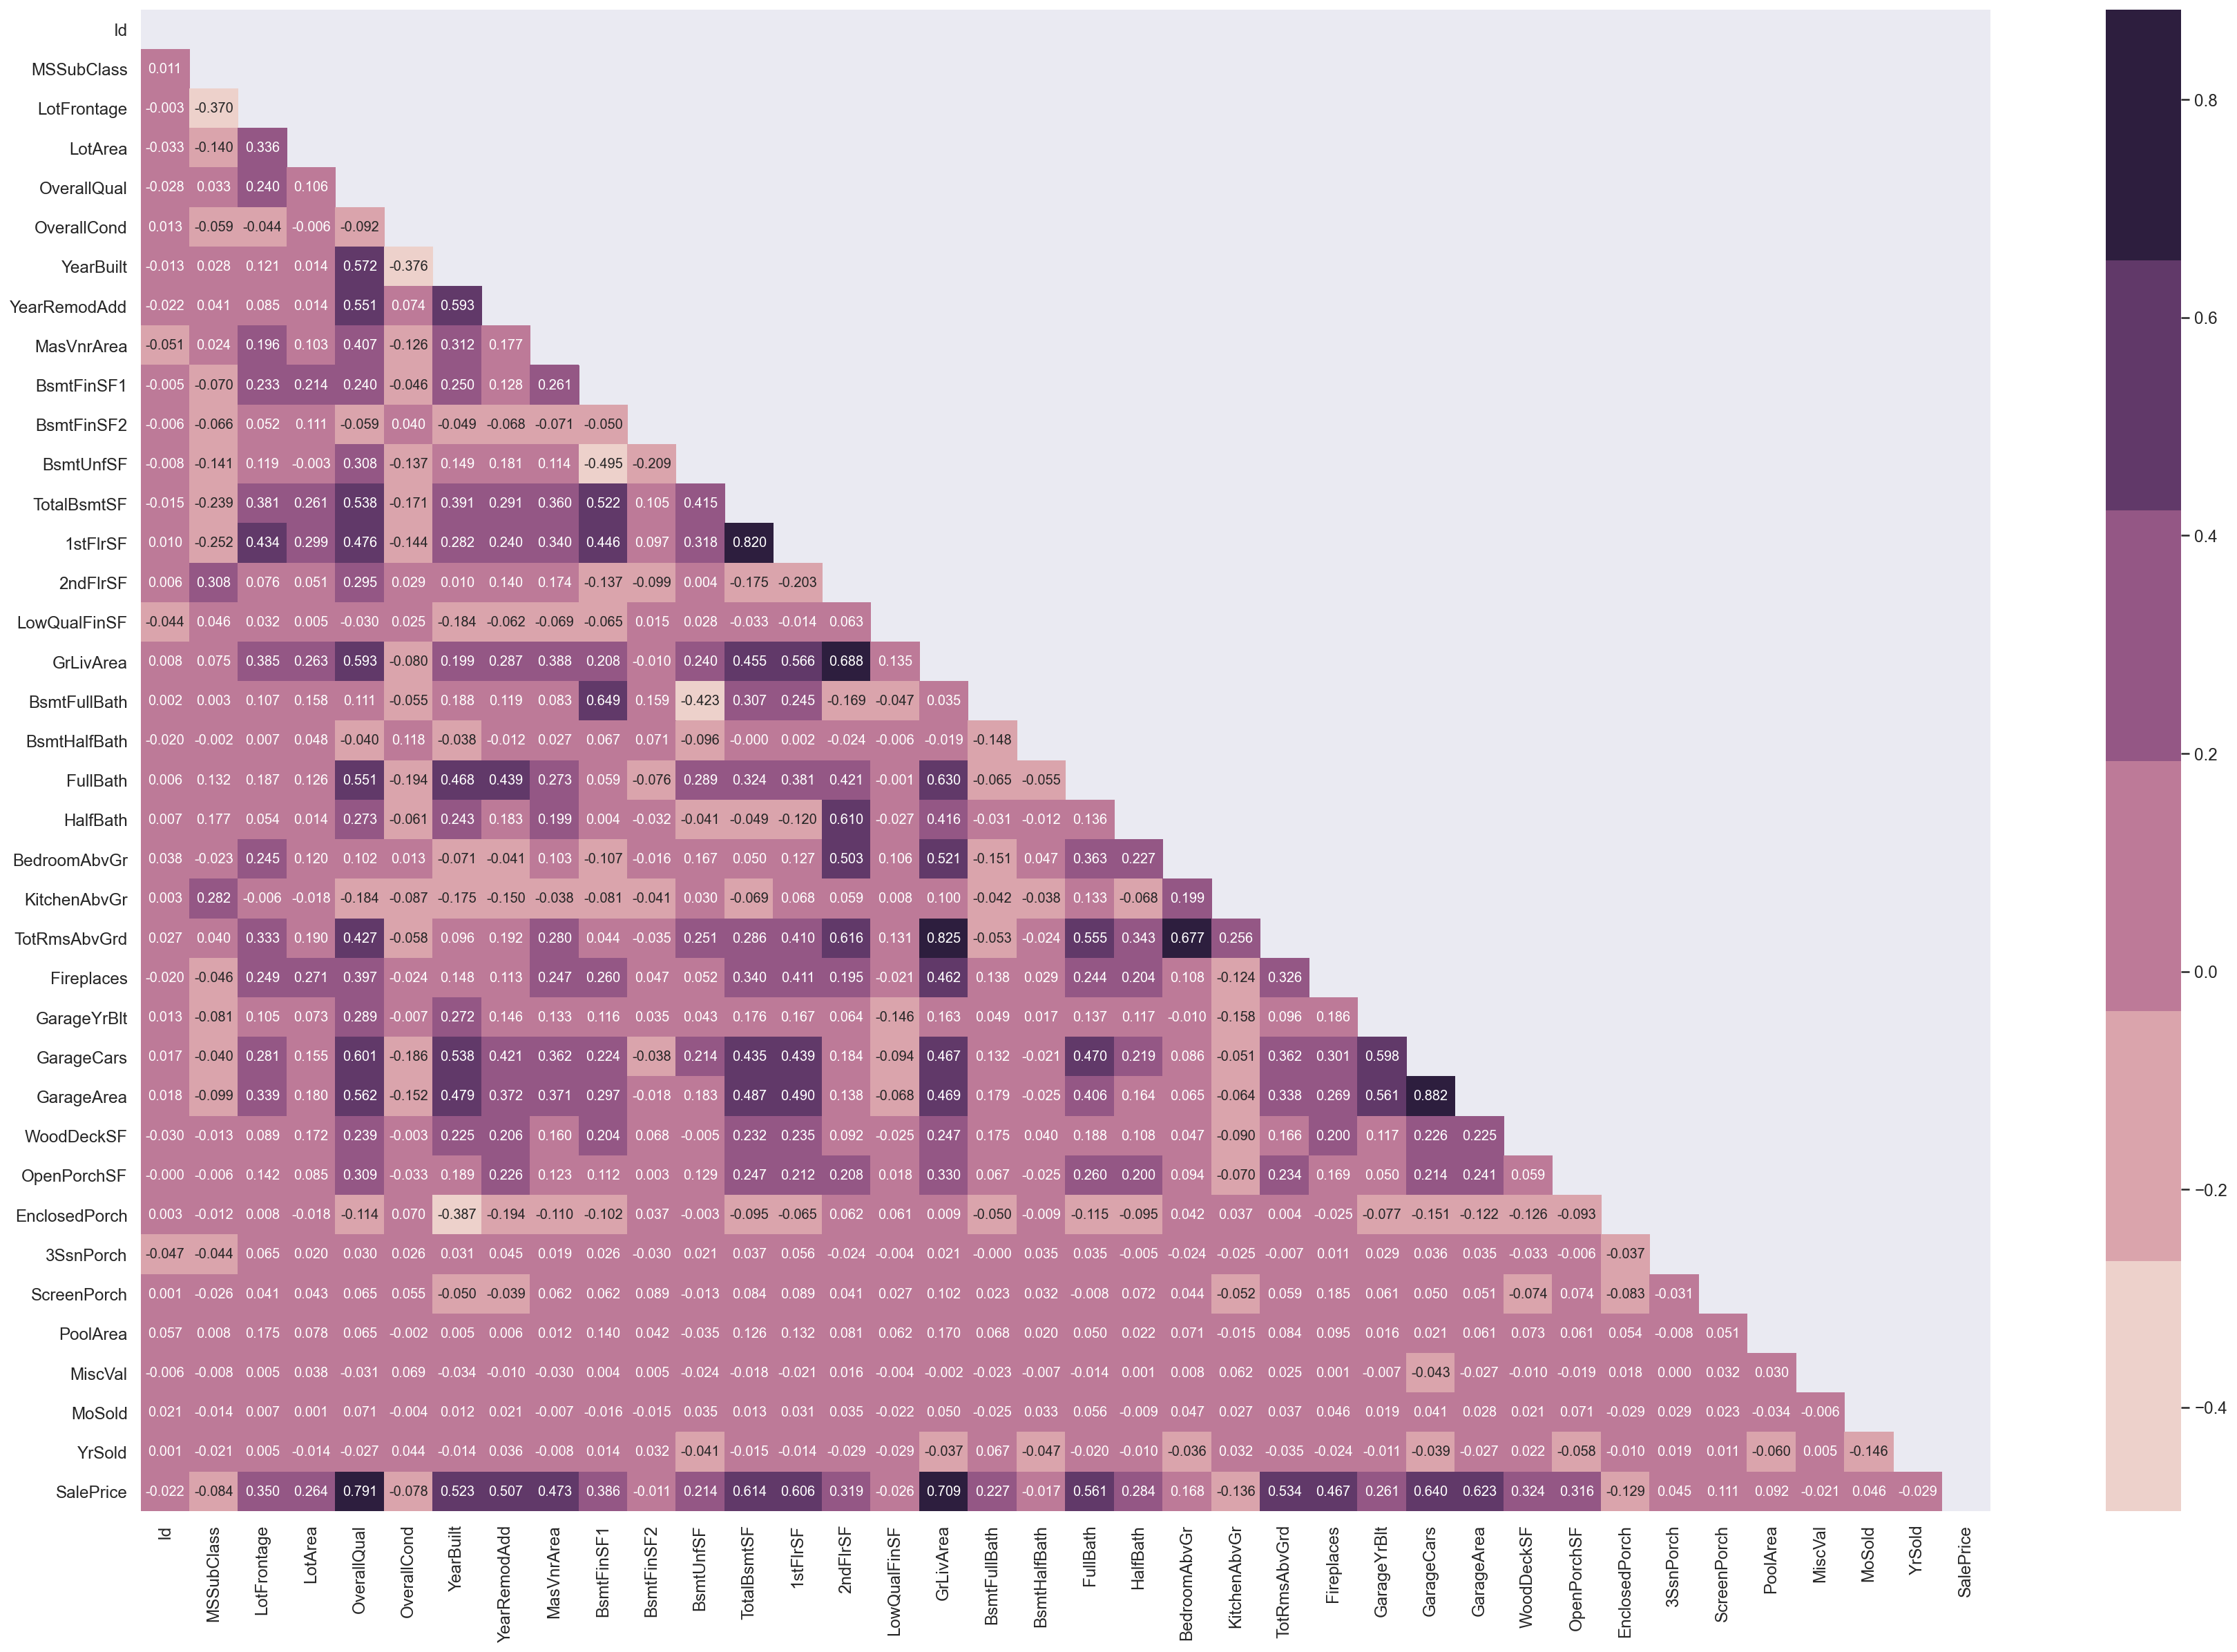

In [30]:
# visualize the linear correlations between all numeric variables
mask = np.triu(train.corr())
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            mask=mask
            );

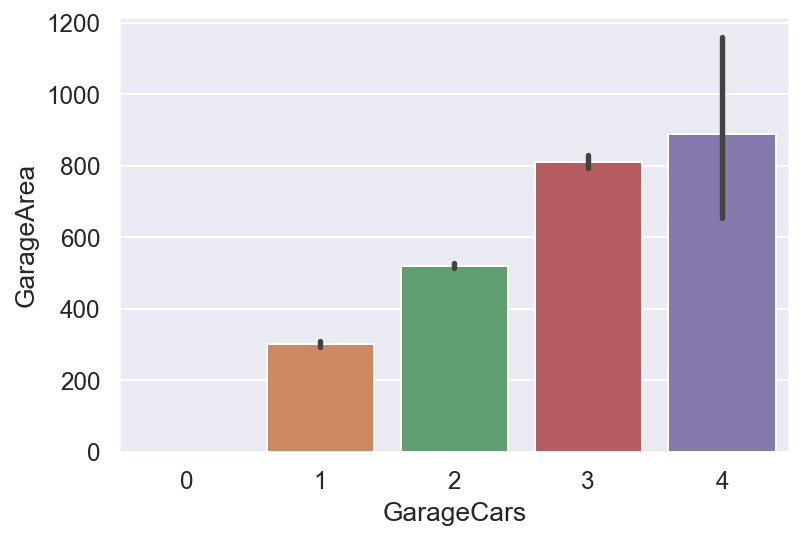

In [35]:
sns.barplot(x='GarageCars',y='GarageArea',data=train);

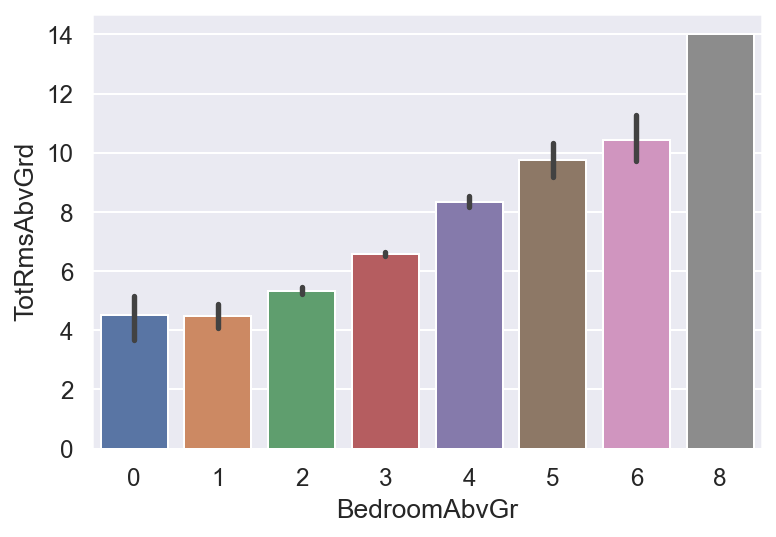

In [36]:
sns.barplot(x='BedroomAbvGr',y='TotRmsAbvGrd',data=train);

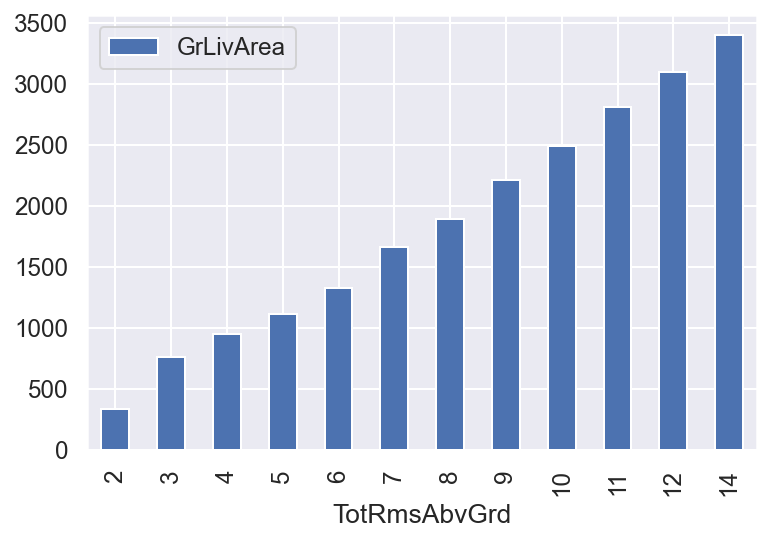

In [37]:
train.groupby('TotRmsAbvGrd').agg('mean')[['GrLivArea']].plot(kind='bar', figsize=(6,4));

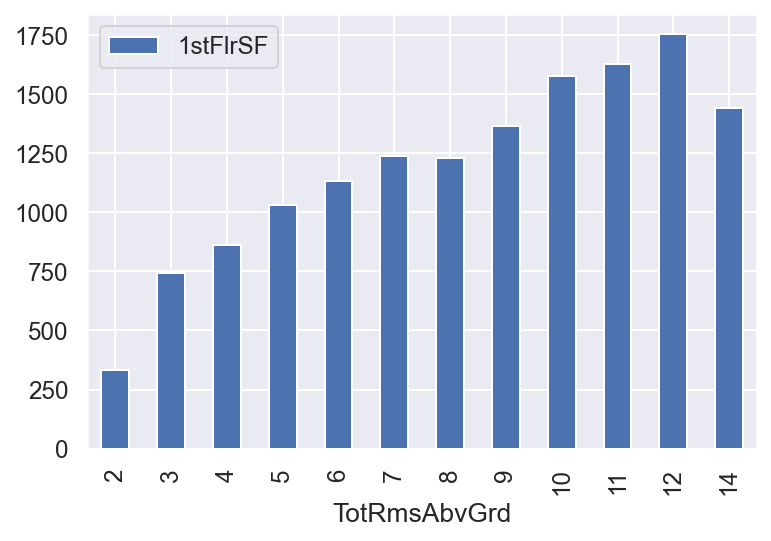

In [38]:
train.groupby('TotRmsAbvGrd').agg('mean')[['1stFlrSF']].plot(kind='bar', figsize=(6,4));

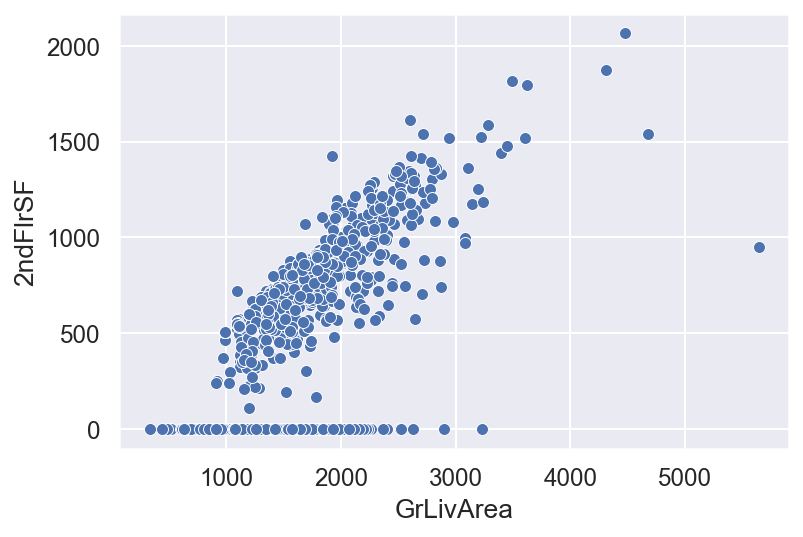

In [39]:
sns.scatterplot(x='GrLivArea',y='2ndFlrSF',data=train);

### General observations from the data visualization:
 - The histogram plot of SalePrice -target- above shows that SalePrice is NOT normally distributed
 

 - From the barplots above, we can observe that:
 
     - Higher Overall Quality Higher SalePrice 
     - Original construction date (Yearbulit) AND Remodel date (YearRemodelAdd)slightly increase overyears in        SalePrice
     - Heating quality and condition affect SalePrice, Better Heating quality and condition higher SalePrice.
     
     
- From the Scatterplots above, we can observe that:     
     
     - Ground living area square feet AND  Size of garage in square feet . has Positive Linear relationship          with SalePrice 

     - with increases First Floor square feet AND Second floor square feet , SalePrice ia also increaseing.
     
     
 - The heatmap above confirmed that there are a linear correlations between the \['SalePrice'\] feature and      the features \['Overall Quality ', 'Yearbulit', 'YearRemodelAdd', 'GrLivArea', 'GarageArea','1stFlrSF'        ,'2ndFlrSF'\]
 
  
 - The heatmap also showed a strong correlation between the 'GarageCars' and 'GarageArea' features.
   AND between 'BedroomAbvGr' ,'TotRmsAbvGrd'features ,Also between 'GrLivArea','TotRmsAbcGrd'Features .And      between'GrLivArea','2ndFlrSF' Features,Also between '1stFlrSF','TotRmsAbcGrd'Features . 
 
 
 
 - The final Barplot&Scatterplot showed clearly the correlation between the features I explain it above          Between features .So, we need to be careful here since these may cause a multicollinearity problem.

#### Outliers Detection:
Before we start building our models,  we need to identify if our data have outliers or not?

From the Boxplot below, it is clear that there are a number of outlier data points in this dataset, however, 

to address this problem we decided not to drop or lose any data, instead, we chose to build multiple models that depend on the (Lasso regularization),  an algorithm that is robust against outliers. We also tried to use the (Huber Loss Function), as it is less sensitive to outliers.

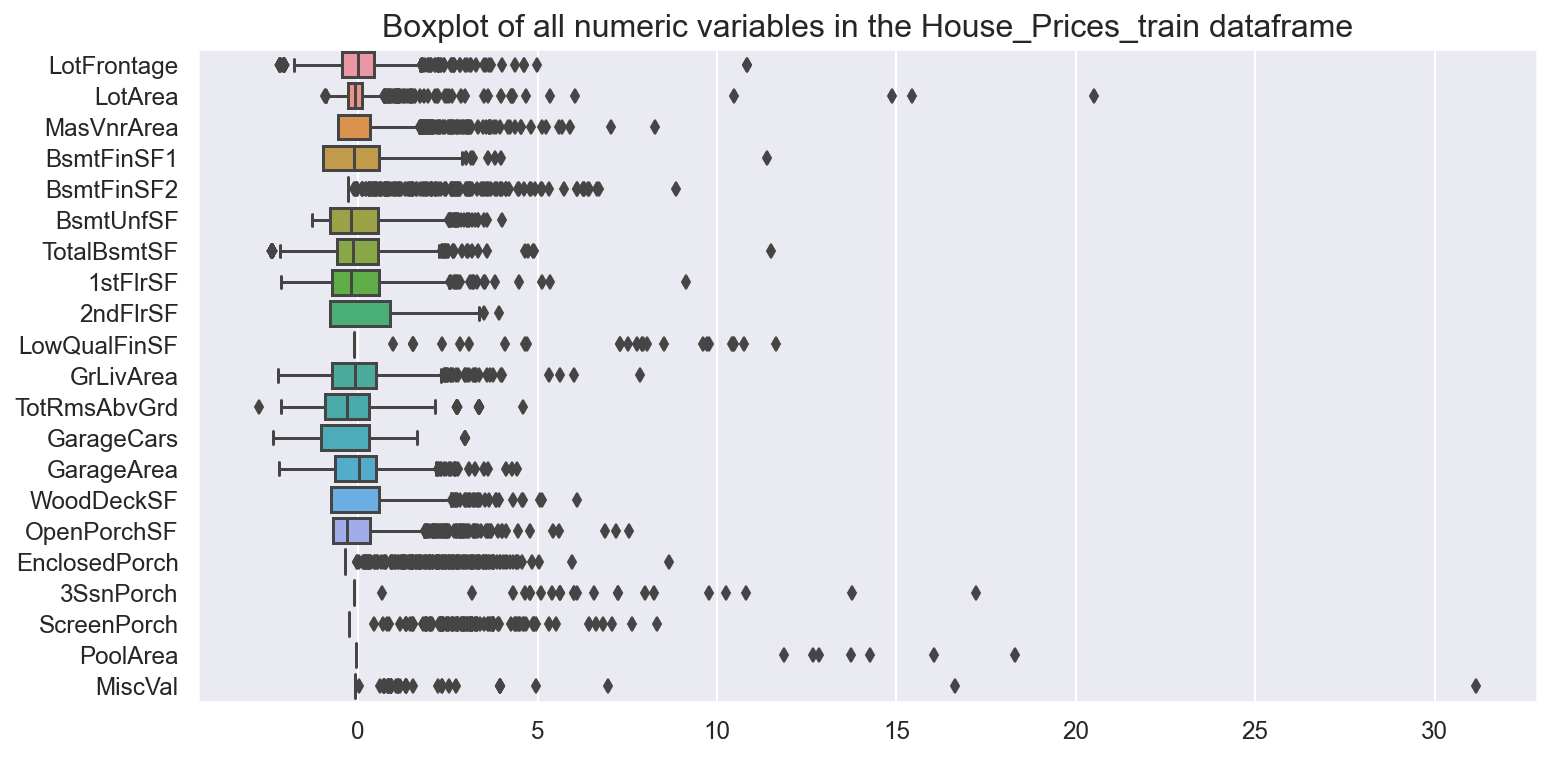

In [55]:
# visualize the data Boxplots to identify outliers

# First, we need to standardize our dataframe, so all the values can be on the same scale
train_stand = (train[Numeric_cols] - train[Numeric_cols].mean()) / train[Numeric_cols].std()

# Then, we plot the data
plt.figure(figsize=(12,6))
sns.boxplot(data=train_stand, orient='h');
plt.title('Boxplot of all numeric variables in the House_Prices_train dataframe' , fontsize=16);

## Preprocessing and Modeling
---

### Preprocessing

#### Processing categorical variables:

In [43]:
## One Hot Encoding ##

train = pd.get_dummies(train, columns=Categorical_cols, drop_first=True)
test = pd.get_dummies(test, columns=Categorical_cols, drop_first=True)

In [44]:
train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [45]:
test.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,...,0,0,0,0,1,0,0,0,1,0


#### Features Selection:

For this project, to be able to find the best predictive model and answer the question: “what is the predicted sale price of a given house?”, we decided to use the (Lasso regularization) algorithm which can do features selection for us.

In [46]:
# extract the set of columns that exist in training data but not in testing data

train_drop_list = ['Id']
for col in train.columns:
    if col not in test.columns:
        train_drop_list.append(col)

# train_drop_list

In [47]:
# extract the set of columns that exist in testing data but not in training data

test_drop_list = ['Id']
for col in test.columns:
    if col not in train.columns:
        test_drop_list.append(col)

# test_drop_list

In [49]:
#Features Selection

# train data
X_train = train.drop( train_drop_list , axis=1)
y_train = train['SalePrice']

# test data
X_test = test.drop( test_drop_list , axis=1)

#### Data Scaling

In [57]:
# data Scaling
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

#### Train/Test split
We do not need to (Train/Test) split this data because it was already split by Kaggle.

### Modeling
**For this project, we decided  to work with the following algorithms:**
 - **Lasso;** This model is a statistical formula whose main purpose is the feature selection and                   regularization of data models. Also lasso is robust to outliers because it works by restricting the sum of       the absolute value of the coefficients to being less than a set value, so the impact of outliers is           significantly curtailed.
 - **Lassocv;** Performs cross-validation (CV) for Lasso regression and plots the results in order to select       the optimal Lasso parameter
 - **Adaptative boosting (with Lasso Model);** This model add the weak learners one by one, looking at each        iteration for the best possible pair, we used it with lasso to enhance it .
 - **Gradient Tree Boosting (with Lasso Model)** Gradient boosting is a generalization of AdaBoosting               improving the performance of the approach and introducing ideas from bootstrap aggregation to                 further improve the models, such as randomly sampling the samples and features when fitting                   ensemble members, we used it with lasso to enhance it.
 - **Bagging Classifier (with Lasso Model);** samples are independently created by resampling the training         data using uniform weights (e.g. a uniform sampling distribution). In other words each model in the           ensemble votes with equal weight.In order to reduce model variance.
 
We chose to work with the Lasso models, as they are robust against outliers, and we also tried to use ensemble Bagging and Boosting to further enhance our results.

**For each model we:**
 1. Used the House_Prices_train dataset to build a predictive model.
 2. Evaluated the model using the R-square score of the train dataset, and 5-fold cross-validation score.
 3. Used the model to predict the prices of the houses in the House_Prices_test dataset, and generate an         output file for the Kaggle submission.

### Lasso Model

In [69]:
# Initialize the Lasso model
model = Lasso(alpha=1.0)

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("Lasso R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("Lasso R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

 # save output file 
file_name = './predictions/Lasso_1.csv'
output.to_csv(file_name)

Lasso R-square score:  0.9386091362779136
Lasso R-square cross validation score:  0.7244743158695315


### LassoCV Model

In [70]:
# Initialize the model
model = LassoCV()  

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("LassoCV R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("LassoCV R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

 # save output file 
file_name = './predictions/LassoCV_1.csv'
output.to_csv(file_name)

LassoCV R-square score:  0.8965612294597044
LassoCV R-square cross validation score:  0.8236402718018787


In [71]:
# show the best alpha parameter that was found through cross-validation
lasso_best_alpha = model.alpha_
print("The best alpha of LassoCV:", lasso_best_alpha)

The best alpha of LassoCV: 1130.7083239573274


### Adaptative boosting (with Lasso Model)

In [74]:
# Initialize the Lasso model using the best alpha of LassoCV
lass = Lasso(alpha=1130.7)

# Initialize the AdaBoost model
model = AdaBoostRegressor(base_estimator=lass , n_estimators=100)

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("AdaBoost(Lasso) R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("AdaBoost(Lasso) R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

# save output file 
file_name = './predictions/AdaBoost(Lasso)_1.csv'
output.to_csv(file_name)

AdaBoost(Lasso) R-square score:  0.8633180354815749
AdaBoost(Lasso) R-square cross validation score:  0.6947979012571597


### Adaptative boosting (with Lasso Model) + grid search

In [77]:
# Initialize the Lasso model using the best alpha of LassoCV
lass = Lasso(alpha=1130.7)

# Initialize the AdaBoost model
ada = AdaBoostRegressor(base_estimator=lass)

# Tune the Adaptative boosting with grid search
param = { 'n_estimators': [50, 100],
         'learning_rate':[0.01,.1]}

model = GridSearchCV(estimator=ada, param_grid=param, cv=5, verbose=1, n_jobs=-1 )

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("AdaBoost(Lasso) R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("AdaBoost(Lasso) R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

# save output file 
file_name = './predictions/AdaBoost(Lasso)_1.csv'
output.to_csv(file_name)

AdaBoost(Lasso) R-square score:  0.9071592900720719
AdaBoost(Lasso) R-square cross validation score:  0.8305383120792124


### Gradient Tree Boosting (with Lasso Model)

In [81]:
# Initialize the Lasso model using the best alpha of LassoCV
lass = Lasso(alpha=1130.7)

# Initialize the GradientBoosting model
model = GradientBoostingRegressor(init=lass, 
                                random_state=42,
                                n_estimators = 1000,
                                max_depth = 5,
                                min_samples_leaf = 6,
                                min_samples_split = 10,
                                loss='huber')

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("GradientBoost(Lasso) R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("GradientBoost (Lasso) R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

 # save output file 
file_name = './predictions/GradientBoost(Lasso)_1.csv'
output.to_csv(file_name)

GradientBoost(Lasso) R-square score:  0.9912346690582261
GradientBoost (Lasso) R-square cross validation score:  0.8347847855715738


### Gradient Tree Boosting (with Lasso Model) + grid search

In [82]:
# Initialize the Lasso model using the best alpha of LassoCV
lass = Lasso(alpha=1130.7)

# Initialize the GradientBoosting model
model = GradientBoostingRegressor(init=lass)

# Tune the GradientBoosting with grid search
param_grid={'n_estimators':[100,200,500],
            'learning_rate': [0.1,0.02],
            'max_depth':[20,80],
            'min_samples_leaf':[3,4,5],
            'max_features':[1.0,3]}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# fit the model
model = grid_search.fit(Xs_train,y_train)

# predicting test  values
predictions = grid_search.predict(Xs_test)

# Score the model (R-square)
training_score = grid_search.score(Xs_train, y_train)
print("GradientBoost(Lasso) R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(grid_search , Xs_train , y_train , cv = 5) )
print("GradientBoost (Lasso) R-square cross validation score: " , cv_score ) # create output dataframe

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

# save output file
output.to_csv('GradientBoost(Lasso)with grid_search.csv')

GradientBoost(Lasso) R-square score:  0.9999999851829021
GradientBoost (Lasso) R-square cross validation score:  0.836755930768682


### Bagging Regressor (with Lasso Model)

In [83]:
# Initialize the Lasso model using the best alpha of LassoCV
lass = Lasso(alpha=1130.7)

# Initialize the Bagging Regressor model
br = BaggingRegressor(base_estimator=lass)

# Tune the Bagging Regressor with grid search
param = { 'n_estimators': [10, 20, 50, 100], 
         'max_features': [0.6, 0.7, 0.8, 0.9, 1.0],
         'max_samples':[0.5, 0.7 ,0.9, 1.0],
         'bootstrap':[True,False]
        }

model = GridSearchCV(estimator=br, param_grid=param, cv=5, verbose=1, n_jobs=-1 )

# fit the model
model = model.fit(Xs_train,y_train)

# predicting test  values
predictions = model.predict(Xs_test)

# Score the model (R-square)
training_score = model.score(Xs_train, y_train)
print("BaggingRegressor(Lasso) R-square score: " , training_score )

# Cross validate score
cv_score = np.mean( cross_val_score(model , Xs_train , y_train , cv = 5) )
print("BaggingRegressor(Lasso) R-square cross validation score: " , cv_score )

# create output dataframe
ids=test['Id']
output = pd.DataFrame({'Id':ids , 'SalePrice':predictions})
output.set_index('Id', inplace=True)

# save output file 
file_name = './predictions/BaggingRegressor(Lasso)_1.csv'
output.to_csv(file_name)

BaggingRegressor(Lasso) R-square score:  0.8845377047361641
BaggingRegressor(Lasso) R-square cross validation score:  0.8398937574417811


## Evaluation and Conceptual Understanding
---

### baseline accuracy:
The baseline accuracy is the the simplest possible prediction, since we are working on a regression problem. We can use a central tendency measure as the result for all predictions, such as finding the mean.

**Baseline score = 0.0** , and all models we tested have beaten this benchmark score.

In [97]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_train, y_train)

0.0

### Results:

For each model we trained, we evaluated its performance on the training dataset using:
 1. R_squared score (The default scoring metric in the linear regression)
 2. 5-fold cross-validation (To diagnose the existence of overfitting)
 3. RMSE score (The same metric that the Kaggle competition uses in the leaderboard)

| Model | R-square score (training data) | Cross validation score (training data) | RMSE Kaggle score (testing data)|
| ------|-------|--------------|----------------------|
|Lasso|0.93860|0.72447|0.60091|
|LassoCV| 0.89656 | 0.82364 | 0.15294|
|AdaBoost(Lasso) no grid| 0.86331 | 0.69479 |0.27784|
|AdaBoost(Lasso) with grid| 0.90715|0.83053| 0.15134|
|GradientBoost(Lasso) no grid| 0.99123 | 0.83478 |0.13889| 
|GradientBoost(Lasso) with grid| 0.99999 | 0.83675 | 0.13971 |
|BaggingRegressor(Lasso) with grid|0.88453| 0.83989 | 0.15338 |

### Results Interpretation:

When we applied our selected models and comparing our results, we can see that the (Gradient Tree Boosting) with and without grid search classifier gives better scores than the other models, even though it shows signs of overfitting as the R_squared scores are significantly higher than the cross-validation score.

In addition, we can see that (LassoCV) and the (Lasso_BaggingRegressor) dealt much better with the overfitting problem and obtained good results that are very close to the best score of (Lasso_AdaBoost).

 ### Best result from Kaggle:
 
We obtained our best Kaggle result using the whole set of features to build a Gradient Boosting Regressor with 'Lasso' as an initial estimator and 'Huber' as the loss function.

![](Best_Kaggle_Result.png)

## Conclusions and Recommendations
---
In this project, we worked on the House Prices challenge, an interesting competition hosted by Kaggle. In which, we tried to predict the prices of a given house based on a set of variables describing this house. To do that, we performed the following essential steps:
- Cleaning the data (to deal with wrong data)
- EDA and Data Visualization (to understand the data and the relationships in it)
- Preprocessing the data, and Building the prediction models
- Evaluating the prediction scores, and Submitting the prediction to Kaggle

To solve this problem, we used the whole set of features to train several regression models, some of them with the best parameters obtained from a grid search. In conclusion, we were able to build a model that can predict house prices with a Root Mean Square Error equals (0.13889). And to get such accuracy we recommend using the 'Lasso' estimator with the 'Huber' loss function to build a Gradient Boosting Regressor.

Finally, for future work, we would like to improve our results even more by experimenting with the following  suggestions:
 - Do more work on the data and features engineering
 - Work with a subset of training features instead of using the whole data
 - Try different regression models, maybe (Ridge or DecisionTreeRegressor)